# Logistic Regression

## Name Rebecah Kwak

## Class Vol3

## Date Week 11

In [3]:
import numpy as np
import scipy as cp
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import statsmodels.api as sm
import time
from matplotlib import pyplot as plt

## Problem 1

Create a classifier called `LogiReg` that accepts an $(n \times 1)$ array $y$ of binary labels ($0$'s and $1$'s) as well as an $(n \times d)$ array $X$ of data points. Write a `fit()` method that finds and saves the optimal $\widehat{\boldsymbol{\beta}}$.

## Problem 2

Write a method called `predict_prob()` that accepts an $(n \times d)$ array $x\_test$ and returns $P(Y=1 | x\_test)$. Also write a method called `predict()` that calls `predict_prob()` and returns an array of predicted labels ($0$'s or $1$'s) for the given array $x\_test$.

In [3]:
class LogiReg():
    """ input:
        y: nparray(n, 1) taking values only in {0,1}
        X: nparray(n, d)
    """
    
    def __init__(self, y, X):
        """
        Save y and X as attributes.
        """
        #saving the attributes
        self.X = X
        self.X = sm.add_constant(self.X)
        self.y = y
    
    
    def fit(self):
        """
        Updates beta, the coefficient array of shape (d, 1) that
        minimizes the negative log likelihood for the given data 
        with the model p(y|x) = sigm(x^T @ beta).      
        """
        #minimizing function
        f = lambda b: np.sum(self.y*np.log(1+np.exp(-self.X@b))+
                             (1-self.y)*np.log(1+np.exp(self.X@b)))
        #saving optimal beta
        self.opt_beta = minimize(f, np.random.random(np.shape(self.X)[1])).x
        
    def predict_prob(self, x_test):
        """
        Returns the predicted probability of an input x_test.
        If x_test has shape (p, q), then the predicted probability
        has shape (1, q).
        """ 
        #returns the sigmoid function
        return cp.special.expit(x_test@self.opt_beta)
        
    def predict(self, x_test):
        """
        Returns the predicted classification (1 or 0) of x_test.
        If x_test has shape (p, q), then the predicted classification
        has shape (1, q).
        """
        #returns the classifier piecewise function
        return [1 if self.predict_prob(i) >= .5 else 0 for i in sm.add_constant(x_test)]

## Problem 3

Test your classifier from the previous two problems using arrays $X$, $y$, and $X\_test$. Train your classifier on $X$ and $y$. Then generate a list of predicted labels using your trained classifier and $X\_test$, and use it to plot $X\_test$ with a different color for each predicted label.

In [4]:
data = np.column_stack(( 
    np.concatenate(( 
        # draw from 2 2-dim. multivariate normal dists.
        np.random.multivariate_normal(np.array([1,2]), np.eye(2), 100),
        np.random.multivariate_normal(np.array([4,3]), np.eye(2), 100) )), 
    # labels corresonding to each distribution
    np.concatenate(( np.zeros(100), np.ones(100) )) ))
np.random.shuffle(data)
# extract X and y from the shuffled data
X = data[:,:2]
y = data[:,2].astype(int)

X_test = np.concatenate(( 
    # draw from 2 identical 2-dim. multivariate normal dists.
    np.random.multivariate_normal(np.array([1,2]), np.eye(2), 100),
    np.random.multivariate_normal(np.array([4,3]), np.eye(2), 100) ))
np.random.shuffle(X_test)

#################################################

#getting the predicted labels
log = LogiReg(y, X)
log.fit()
labels = 

#plotting Original Data
plt.scatter(X[:,0], X[:,1], c = y) 
plt.title("Original Data")
plt.show()

#plotting New Data with LogiReg
plt.scatter(X_test[:,0], X_test[:,1], c = log.predict(X_test))
plt.title("New Data with LogiReg")
plt.show()

SyntaxError: invalid syntax (3552324882.py, line 24)

## Problem 4

Using each of `LogiReg`, `statsmodels`, and `sklearn`, train a logistic regression classifier on $X$ and $y$ to generate a list of predicted labels for $X\_test$. Then, using $y\_test$, print the accuracy scores for each trained model. Compare the accuracies and training/testing time for all three classifiers. Be sure to add a constant feature with each model.

In [ ]:
# predefine the true beta
beta = np.random.normal(0, 7, 20)

# X is generated from 2 20-dim. multivariate normal dists.
X = np.concatenate(( 
        np.random.multivariate_normal(np.zeros(20), np.eye(20), 100), 
        np.random.multivariate_normal(np.ones(20)*2, np.eye(20), 100) ))
np.random.shuffle(X)
# create y based on the true beta
pred = 1. / (1. + np.exp(-X @ beta))  
y = np.array( [1 if pred[i] >= 1/2 else 0 
            for i in range(pred.shape[0])] )

# X_test and y_test are generated similar to X and y
X_test = np.concatenate(( 
        np.random.multivariate_normal(np.zeros(20), np.eye(20), 100), 
        np.random.multivariate_normal(np.ones(20), np.eye(20), 100) ))
np.random.shuffle(X_test)
pred = 1. / (1. + np.exp(-X_test @ beta))
y_test = np.array( [1 if pred[i] >= 1/2 else 0 
            for i in range(pred.shape[0])] )
###########################################


a = time.time()

#Timing LogiReg
log = LogiReg(y, X)
log.fit()       
log_labels = log.predict(X_test)

b = time.time()

log_time = b - a
#Timing statsmodels
sm_X = sm.add_constant(X)
model = sm.Logit(y, X).fit_regularized(disp=0)
st_X_test = sm.add_constant(X_test)
Probs = sm_model.predict(st_X_test)
st_labels = [1 if i >= 0.5 else 0 for i in Probs]

c = time.time()

st_time = c-b

#Timing sklearn
sk_model = LogisticRegression(fit_intercept=True).fit(X, y)
sk_labels = sk_model.predict(X_test)

d = time.time()

sk_time = d-c

#getting accuracy score
log_score = accuracy_score(y_test, log_labels)
st_score = accuracy_score(y_test, st_labels)
sk_score = accuracy_score(y_test, sk_labels)

#printing accuracy score
print("Accuracy score for LogiReg = " + str(log_score))
print("Accuracy score for statsmodel = " + str(st_score))
print("Accuracy score for sklearn = " + str(sk_score))
print("\n")

#printing the time
print("LogiReg time = " + str(log_time))
print("statsmodels time = " + str(st_time))
print("sklearn time = " + str(sk_time))

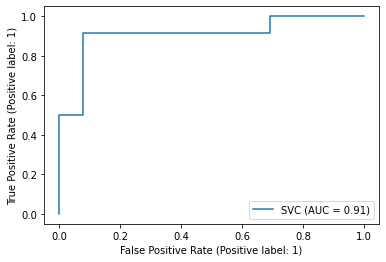

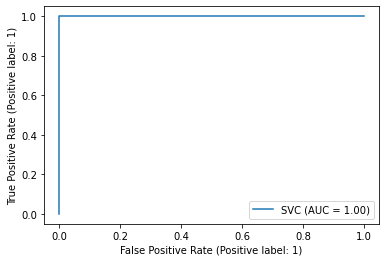

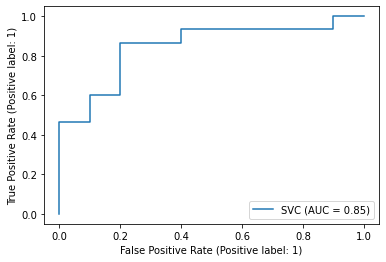

In [11]:
from sklearn import datasets, metrics, model_selection, svm

#(i)
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

#(ii)
X, y = datasets.make_classification(random_state=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

#(iii)
X, y = datasets.make_classification(random_state=2)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

## Problem 5

Import the Iris Dataset and perform a train-test split on only the first two columns of the data with `test_size=0.4`. Train a multinomial logistic regression model using the training data with an added constant feature, and generate prediction labels for the test data.

Plot the test data by color using your prediction labels.

In [ ]:
#getting the datas
iris = datasets.load_iris()

#training the datas
data = train_test_split(iris.data[:,:2], iris.target, test_size = 0.4)

#getting the model
model = LogisticRegression(multi_class='multinomial',fit_intercept=True).fit(data[0], data[2])

#plotting the original data
plt.scatter(data[1][:,0], data[1][:,1], c = data[3])
plt.title("Acutal X_test Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

#Plotting the predcited values
plt.scatter(data[1][:,0], data[1][:,1], c = model.predict(data[1]))
plt.title("Predicted X_test Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#getting the datas
iris = datasets.load_iris()

#training the datas
data = train_test_split(iris.data[:,:2], iris.target, test_size = 0.4)

#getting the model
model = LogisticRegression(multi_class='multinomial',fit_intercept=True).fit(data[0], data[2])

#plotting the original data
plt.scatter(data[1][:,0], data[1][:,1], c = data[3])
plt.title("Acutal X_test Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

#Plotting the predcited values
plt.scatter(data[1][:,0], data[1][:,1], c = model.predict(data[1]))
plt.title("Predicted X_test Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

#part(i): Use scikit-learn's method to dividde the iris dataset into a
#70-30 train-test split
iris = datasets.load_iris()
#X_train, X_test,Y_train, Y_test
data = train_test_split(iris.data, iris.target, test_size = 0.3)

gaussian = GaussianNB()
%timeit gaussian.fit(data[0], data[2])
accuracy_score(data[3], gaussian.predict(data[1]))

266 µs ± 741 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


0.9777777777777777

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.preprocessing import OrdinalEncoder

#5.11
Use the RandomForestClassifier from sklearn.ensemble to build a forest with 100 trees that classifies (predicts death of passengers) in the Titanic dataset.

(i) Use the oob_score to estimate the accuracy of the predictions.

In [3]:
#load in titanic dataset:
titanic_df = pd.read_csv('titanic.csv',index_col='PassengerId')

#clean the data to only have stuff that we want to work with:
x = titanic_df[titanic_df.columns].drop(labels=['Name','Ticket','Cabin'],axis=1)
mask = x['Sex'] == 'male'
x['Sex'] = 1*mask
x.dropna(inplace=True)  #drop all nan values
cmask = x['Embarked'] == 'C'
smask = x['Embarked'] == 'S'
x['Embarked'] = cmask*2 + smask*1

y = x['Survived']
x.drop('Survived',axis=1,inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x  #display the dataframe now

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [2]:
(ii) Use oob_score with various combinations of hyperparameters in the RandomForestClassifier applied to the Titanic dataset in order to find the optimal values of max_depth and max_features. Hint: Be sure to set warm_start=False—if you forget, each of your experiments could build on the previous forest instead of starting over.

SyntaxError: invalid syntax (2906684970.py, line 1)

In [ ]:
(iii) Using the combination of hyperparameters that gave the best value of oob_score, identify the three most-important features and the three least-important features using feature_importances_. How do the re- sults compare with your intution about which features are most and least important?